In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [58]:
df = pd.read_csv('./KiaAutoLandPurchased.csv',sep=';')
df.head(20)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [22]:
x = df[['Age','EstimatedSalary']].values
y = df['Purchased'].values

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [24]:
escala = MinMaxScaler()
x_train = escala.fit_transform(x_train)
x_test = escala.transform(x_test)

### Decidir el valor de K

In [25]:
params = {'n_neighbors': [2,3,4,5,6,7,8,9,10]}

knn = KNeighborsClassifier()
model = GridSearchCV(knn,params,cv=5)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 9}

In [54]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [55]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[58,  5],
       [ 1, 36]], dtype=int64)

In [56]:
print(accuracy_score(y_test,y_pred))

0.94


In [60]:
compra_si = df[df['Purchased']==1]
compra_no = df[df['Purchased']==0]

clase  [0]
probabilidades  [[0.77777778 0.22222222]]


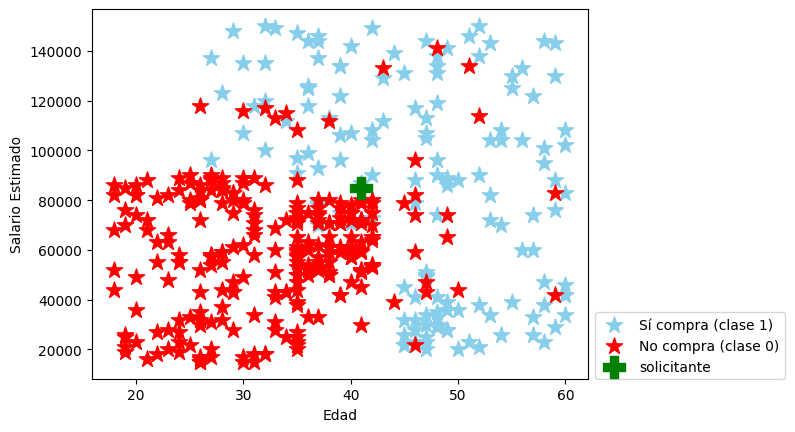

In [67]:
edad = 41
monto = 85000

solicitante = escala.transform([[edad,monto]])
print('clase ',knn.predict(solicitante))
print('probabilidades ',knn.predict_proba(solicitante))

plt.scatter(compra_si['Age'], compra_si['EstimatedSalary'],
            marker='*',s=150,color='skyblue',
            label='Sí compra (clase 1)')
plt.scatter(compra_no['Age'], compra_no['EstimatedSalary'],
            marker='*',s=150,color='red',
            label='No compra (clase 0)')
plt.scatter(edad, monto,
            marker='P',s=250,color='green',
            label='solicitante')
plt.xlabel('Edad')
plt.ylabel('Salario Estimado')
plt.legend(bbox_to_anchor=(1,0.2));